Dataset saved to lorenz_system_data.csv'.


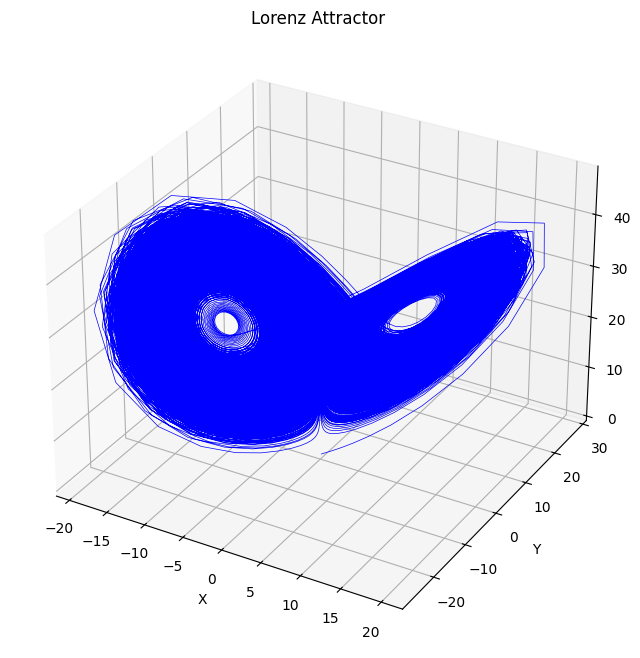

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import os

# Konstanten für das Lorenz-System
sigma = 10
rho = 28
beta = 8 / 3

# Definition der Lorenz-Gleichungen
def lorenz_deriv(state, t, sigma, rho, beta):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

# Funktion zur Generierung von Lorenz-System-Daten basierend auf Sampling-Parametern und Initialwerten
def generate_lorenz_data(num_points, sampling_rate, initial_state, period):
    """
    Generiert Lorenz-System-Daten basierend auf Sampling-Parametern und Initialwerten.

    Parameter:
    - num_points: Gesamtanzahl der Datenpunkte
    - sampling_rate: Anzahl der Punkte pro Periode
    - initial_state: Liste der Anfangswerte [x0, y0, z0]
    - period: Charakteristische Periode des Lorenz-Systems (Beispielwert)

    Rückgabe:
    - DataFrame mit den Lorenz-System-Daten (Time, X, Y, Z)
    """
    
    # Berechnung der Gesamtdauer der Simulation basierend auf num_points und sampling_rate
    total_time = num_points * period / sampling_rate
    
    # Zeitraster für die Integration
    t = np.linspace(0, total_time, num_points)

    # Numerische Integration der Lorenz-Gleichungen
    trajectory = odeint(lorenz_deriv, initial_state, t, args=(sigma, rho, beta))

    # Extrahieren der x-, y-, z-Komponenten zur Visualisierung
    x, y, z = trajectory.T

    # Erstellen eines DataFrames mit den Ergebnissen
    data = pd.DataFrame({'Time': t, 'X': x, 'Y': y, 'Z': z})
    
    return data

num_points = 50000  # Gesamtanzahl der Datenpunkte
sampling_rate = 30  # Anzahl der Punkte pro Periode
initial_state = [0.1, 0.1, 0.1]  # Anfangswerte [x0, y0, z0]
period = 1  # Charakteristische Periode des Lorenz-Systems

# Generierung der Lorenz-System-Daten
lorenz_data = generate_lorenz_data(num_points, sampling_rate, initial_state, period)

# Speichern des Datensatzes in einer CSV-Datei
file_path = "lorenz_system_data.csv"
lorenz_data.to_csv(file_path, index=False)
print(f"Dataset saved to {file_path}'.")

# Plotten des Lorenz-Attraktors
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(lorenz_data['X'], lorenz_data['Y'], lorenz_data['Z'], lw=0.5, color='b')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Lorenz Attractor")
plt.show()

       Time         X         Y         Z
0  0.000000  0.100000  0.100000  0.100000
1  0.033334  0.113601  0.192469  0.091986
2  0.066668  0.152177  0.305964  0.085208
3  0.100002  0.217968  0.463173  0.080213
4  0.133336  0.319516  0.691044  0.078301


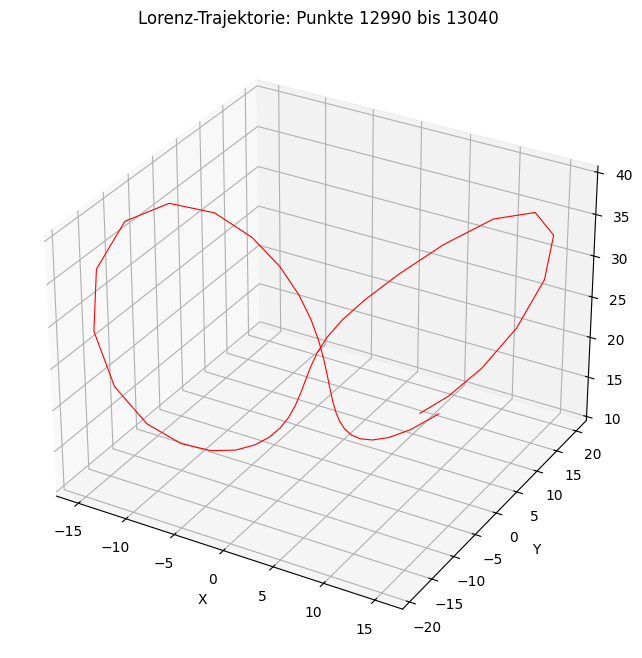

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# CSV-Datei einlesen
file_path = 'lorenz_system_data.csv'  # Ersetze dies durch deinen Dateinamen
data = pd.read_csv(file_path)

# Daten anzeigen (optional)
print(data.head())

# Benutzerdefinierter Bereich für die Trajektorie
start_index = 12990  # Startindex der Sequenz
end_index = 13040  # Endindex der Sequenz
sequence = data.iloc[start_index:end_index]

# Extrahiere X, Y, Z-Koordinaten
x_seq = sequence['X']
y_seq = sequence['Y']
z_seq = sequence['Z']

# Plotten der ausgewählten Sequenz
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_seq, y_seq, z_seq, lw=0.8, color='r')

# Achsentitel und Labels
ax.set_title(f"Lorenz-Trajektorie: Punkte {start_index} bis {end_index}")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


Dataset saved to van_der_pol_data.csv'.


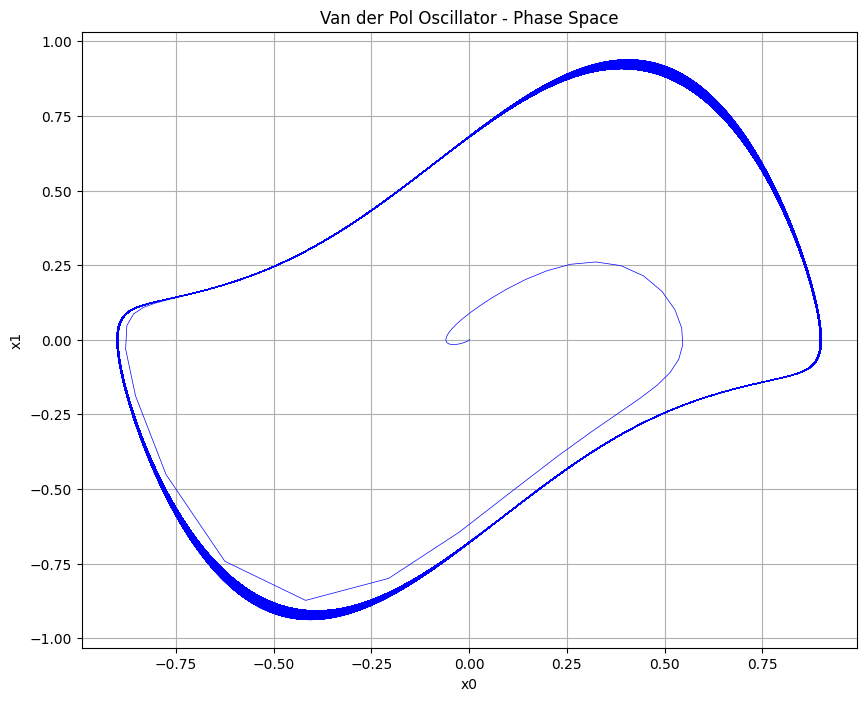

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.integrate import odeint

# Parameter für den Van-der-Pol-Oszillator
p_a, p_mu, p_b, p_c = 2, 2, 5, 0.8

# Definition der Van-der-Pol-Gleichungen
def van_der_pol_deriv(state, t, p_a, p_mu, p_b, p_c):
    x0, x1 = state
    dx0_dt = p_a * x1
    dx1_dt = p_mu * x1 * (1. - p_b * x0**2) - p_c * x0
    return [dx0_dt, dx1_dt]

# Funktion zur Generierung von Van-der-Pol-Daten basierend auf Sampling-Parametern und Initialwerten
def generate_van_der_pol_data(num_points, sampling_rate, initial_state, period):
    """
    Generiert Van-der-Pol-Daten basierend auf Sampling-Parametern und Initialwerten.

    Parameter:
    - num_points: Gesamtanzahl der Datenpunkte
    - sampling_rate: Anzahl der Punkte pro Periode
    - initial_state: Liste der Anfangswerte [x0, x1]
    - period: Charakteristische Periode des Van-der-Pol-Oszillators (Beispielwert)

    Rückgabe:
    - DataFrame mit den Van-der-Pol-Daten (Time, x0, x1)
    """
    
    # Berechnung der Gesamtdauer der Simulation basierend auf num_points und sampling_rate
    total_time = num_points * period / sampling_rate
    
    # Zeitraster für die Integration
    t = np.linspace(0, total_time, num_points)

    # Numerische Integration der Van-der-Pol-Gleichungen
    trajectory = odeint(van_der_pol_deriv, initial_state, t, args=(p_a, p_mu, p_b, p_c))

    # Extrahieren der x0- und x1-Komponenten zur Visualisierung
    x0, x1 = trajectory.T

    # Erstellen eines DataFrames mit den Ergebnissen
    data = pd.DataFrame({'Time': t, 'x0': x0, 'x1': x1})
    
    return data

# Hyperparameter
num_points = 50000  # Gesamtanzahl der Datenpunkte
sampling_rate = 8  # Anzahl der Punkte pro Periode
initial_state = [0.0001, 0.0001]  # Anfangswerte [x0, x1]
period = 1  # Charakteristische Periode des Van-der-Pol-Oszillators

# Generierung der Van-der-Pol-Daten
van_der_pol_data = generate_van_der_pol_data(num_points, sampling_rate, initial_state, period)

# Speichern des Datensatzes in einer CSV-Datei
file_path = "van_der_pol_data.csv"
van_der_pol_data.to_csv(file_path, index=False)
print(f"Dataset saved to {file_path}'.")

# Plotten der Van-der-Pol-Trajektorie
plt.figure(figsize=(10, 8))
plt.plot(van_der_pol_data['x0'], van_der_pol_data['x1'], lw=0.5, color='b')
plt.xlabel("x0")
plt.ylabel("x1")
plt.title("Van der Pol Oscillator - Phase Space")
plt.grid(True)
plt.show()

       Time        x0        x1
0  0.000000  0.000100  0.000100
1  0.125003  0.000127  0.000116
2  0.250005  0.000158  0.000132
3  0.375008  0.000193  0.000150
4  0.500010  0.000233  0.000169


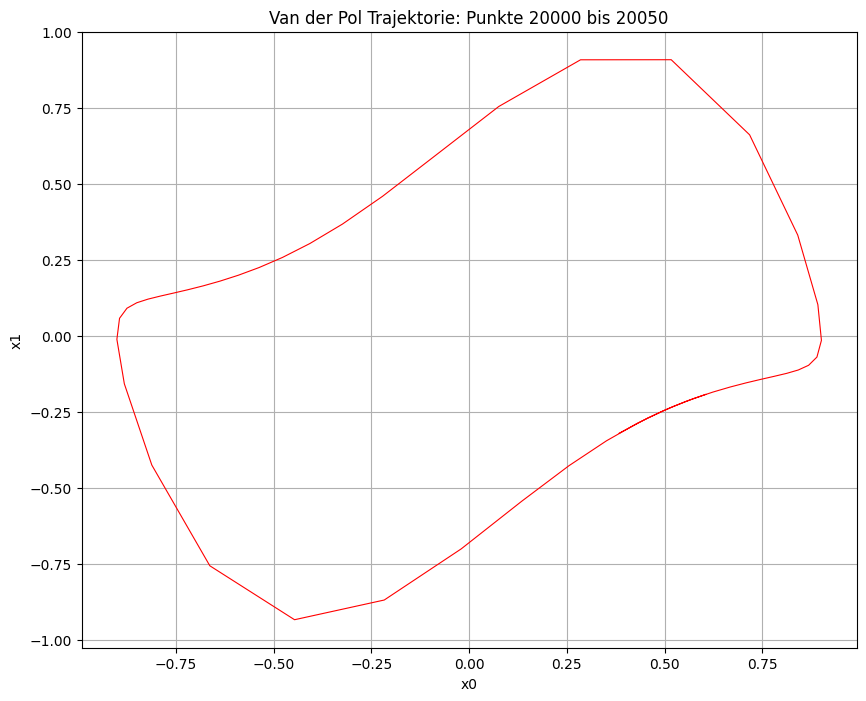

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei einlesen
file_path = '/Users/Aleksandar/Documents/Uni/FP/Modeling_Dynamic_Systems/Models/van_der_pol_data.csv'  # Ersetze dies durch deinen Dateinamen
data = pd.read_csv(file_path)

# Daten anzeigen (optional)
print(data.head())

# Benutzerdefinierter Bereich für die Trajektorie
start_index = 20000  # Startindex der Sequenz
end_index = 20050  # Endindex der Sequenz
sequence = data.iloc[start_index:end_index]

# Extrahiere x0 und x1-Koordinaten
x0_seq = sequence['x0']
x1_seq = sequence['x1']

# Plotten der ausgewählten Sequenz
plt.figure(figsize=(10, 8))
plt.plot(x0_seq, x1_seq, lw=0.8, color='r')

# Achsentitel und Labels
plt.title(f"Van der Pol Trajektorie: Punkte {start_index} bis {end_index}")
plt.xlabel("x0")
plt.ylabel("x1")
plt.grid(True)
plt.show()

Dataset saved to van_der_pol_stochastic_data.csv'


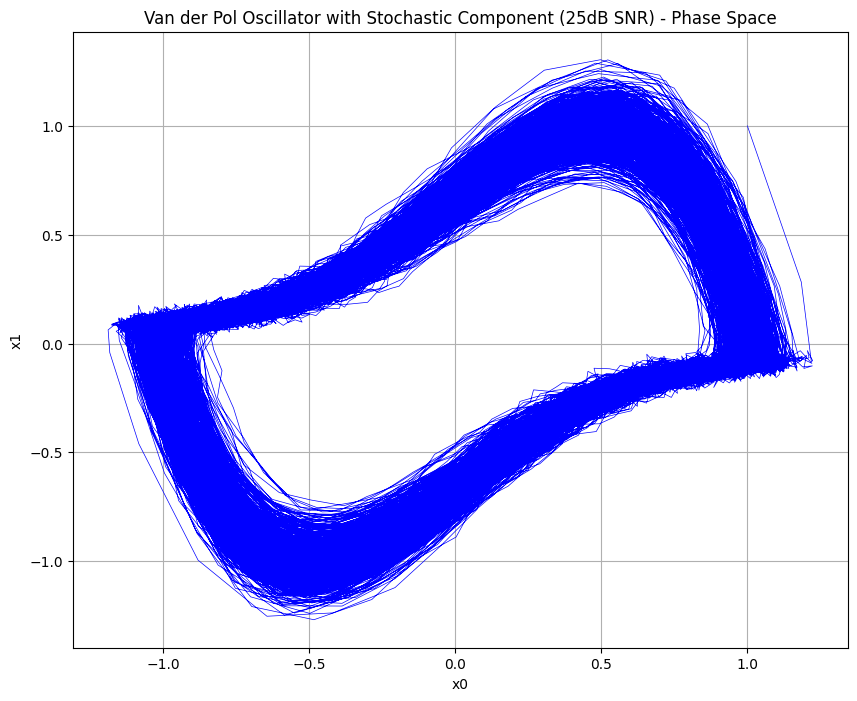

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import os

# Parameter für den Van-der-Pol-Oszillator
p_a, p_mu, p_b, p_c = 2, 2, 5, 0.8

# Definition der Van-der-Pol-Gleichungen mit stochastischer Komponente
def van_der_pol_deriv(state, p_a, p_mu, p_b, p_c, noise_std):
    x0, x1 = state
    dx0_dt = p_a * x1 + noise_std * np.random.randn()
    dx1_dt = p_mu * x1 * (1. - p_b * x0**2) - p_c * x0 + noise_std * np.random.randn()
    return np.array([dx0_dt, dx1_dt])

# Funktion zur Generierung von Van-der-Pol-Daten basierend auf Sampling-Parametern und Initialwerten
def generate_van_der_pol_data(num_points, sampling_rate, initial_state, period, noise_std):
    """
    Generiert Van-der-Pol-Daten basierend auf Sampling-Parametern und Initialwerten.

    Parameter:
    - num_points: Gesamtanzahl der Datenpunkte
    - sampling_rate: Anzahl der Punkte pro Periode
    - initial_state: Liste der Anfangswerte [x0, x1]
    - period: Charakteristische Periode des Van-der-Pol-Oszillators (Beispielwert)
    - noise_std: Standardabweichung des Rauschens

    Rückgabe:
    - DataFrame mit den Van-der-Pol-Daten (Time, x0, x1)
    """
    
    # Berechnung der Gesamtdauer der Simulation basierend auf num_points und sampling_rate
    total_time = num_points * period / sampling_rate
    dt = total_time / num_points
    
    # Initialisierung der Trajektorie
    trajectory = np.zeros((num_points, 2))
    trajectory[0] = initial_state
    
    # Numerische Integration der Van-der-Pol-Gleichungen mit stochastischer Komponente
    for i in range(1, num_points):
        trajectory[i] = trajectory[i-1] + van_der_pol_deriv(trajectory[i-1], p_a, p_mu, p_b, p_c, noise_std) * dt

    # Zeitraster für die Integration
    t = np.linspace(0, total_time, num_points)

    # Extrahieren der x0- und x1-Komponenten zur Visualisierung
    x0, x1 = trajectory.T

    # Erstellen eines DataFrames mit den Ergebnissen
    data = pd.DataFrame({'Time': t, 'x0': x0, 'x1': x1})
    
    return data

# Hyperparameter
num_points = 50000  # Gesamtanzahl der Datenpunkte
sampling_rate = 12  # Anzahl der Punkte pro Periode
initial_state = [1.0, 1.0]  # Angepasste Anfangswerte [x0, x1]
period = 1  # Charakteristische Periode des Van-der-Pol-Oszillators
signal_to_noise_ratio_db = 15  # Signal-Rausch-Verhältnis in dB

# Umrechnung von dB in lineares Verhältnis
signal_to_noise_ratio_linear = 10 ** (signal_to_noise_ratio_db / 10)

# Berechnung der Standardabweichung des Rauschens basierend auf dem Signal-Rausch-Verhältnis
noise_std = np.sqrt(2 / signal_to_noise_ratio_linear)

# Generierung der Van-der-Pol-Daten mit stochastischer Komponente
van_der_pol_data = generate_van_der_pol_data(num_points, sampling_rate, initial_state, period, noise_std)

# Speichern des Datensatzes in einer CSV-Datei
file_path = "van_der_pol_stochastic_data.csv"
van_der_pol_data.to_csv(file_path, index=False)
print(f"Dataset saved to {file_path}'")

# Plotten der Van-der-Pol-Trajektorie mit stochastischer Komponente
plt.figure(figsize=(10, 8))
plt.plot(van_der_pol_data['x0'], van_der_pol_data['x1'], lw=0.5, color='b')
plt.xlabel("x0")
plt.ylabel("x1")
plt.title("Van der Pol Oscillator with Stochastic Component (25dB SNR) - Phase Space")
plt.grid(True)
plt.show()

       Time        x0        x1
0  0.000000  1.000000  1.000000
1  0.083335  1.184530  0.282637
2  0.166670  1.218983 -0.082986
3  0.250005  1.223567 -0.078781
4  0.333340  1.205336 -0.032292


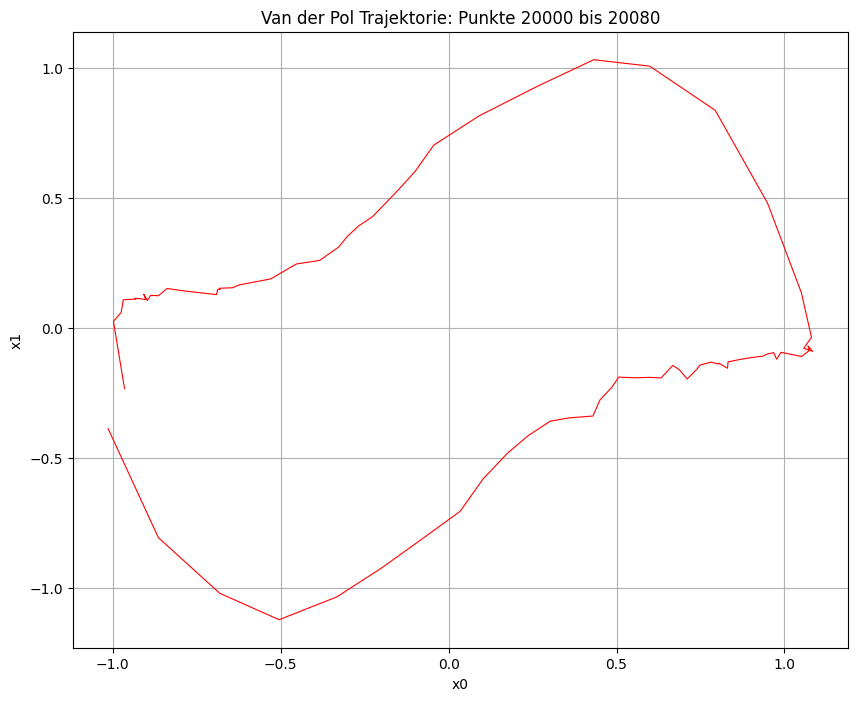

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei einlesen
file_path = '/Users/Aleksandar/Documents/Uni/FP/Modeling_Dynamic_Systems/Models/van_der_pol_stochastic_data.csv'  # Ersetze dies durch deinen Dateinamen
data = pd.read_csv(file_path)

# Daten anzeigen (optional)
print(data.head())

# Benutzerdefinierter Bereich für die Trajektorie
start_index = 20000  # Startindex der Sequenz
end_index = 20080  # Endindex der Sequenz
sequence = data.iloc[start_index:end_index]

# Extrahiere x0 und x1-Koordinaten
x0_seq = sequence['x0']
x1_seq = sequence['x1']

# Plotten der ausgewählten Sequenz
plt.figure(figsize=(10, 8))
plt.plot(x0_seq, x1_seq, lw=0.8, color='r')

# Achsentitel und Labels
plt.title(f"Van der Pol Trajektorie: Punkte {start_index} bis {end_index}")
plt.xlabel("x0")
plt.ylabel("x1")
plt.grid(True)
plt.show()

Epoch: 10 Train Loss: 0.8185202350857061, Validation Loss: 0.8145171510136646
Epoch: 20 Train Loss: 0.6986501162341975, Validation Loss: 0.6977567497154941
Epoch: 30 Train Loss: 0.5430652086682822, Validation Loss: 0.615402648371199
Epoch: 40 Train Loss: 0.3926972542539102, Validation Loss: 0.5621558800339699
Epoch: 50 Train Loss: 0.3252018034321453, Validation Loss: 0.3617653381565343
Epoch: 60 Train Loss: 0.28580727105567216, Validation Loss: 0.3052181937772295
Epoch: 70 Train Loss: 0.24683867213786195, Validation Loss: 0.23585786035527354
Epoch: 80 Train Loss: 0.2207307780827951, Validation Loss: 0.2051041447274063
Epoch: 90 Train Loss: 0.19963430239383234, Validation Loss: 0.1900781575428403
Epoch: 100 Train Loss: 0.19523271548501941, Validation Loss: 0.1892122152382913
test_loss: 0.21716887601043866
Best Train Loss: 0.1964364604118767, Best Val Loss: 0.18873223649418872


/var/folders/xf/tfz20cvn1gl4w8nh4z7tshc00000gn/T/ipykernel_9092/1531728942.py:321: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


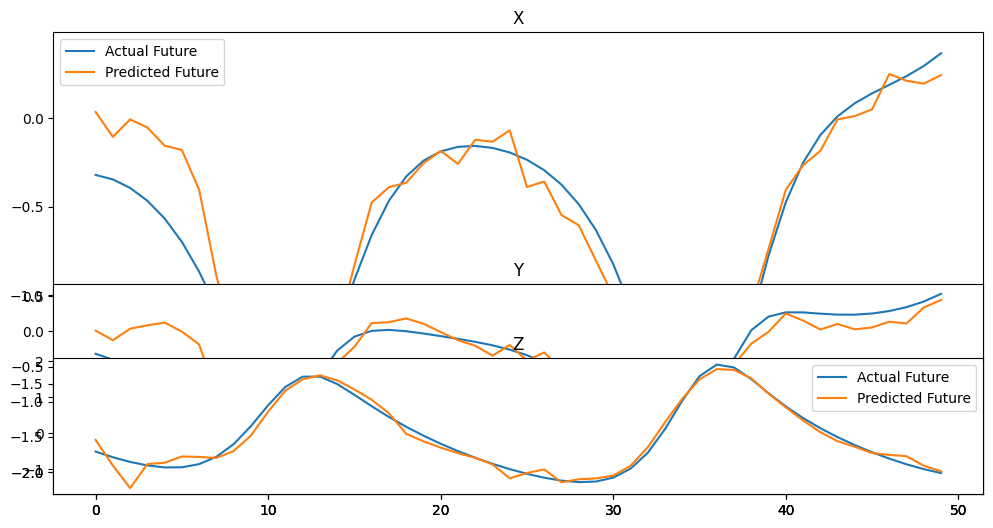

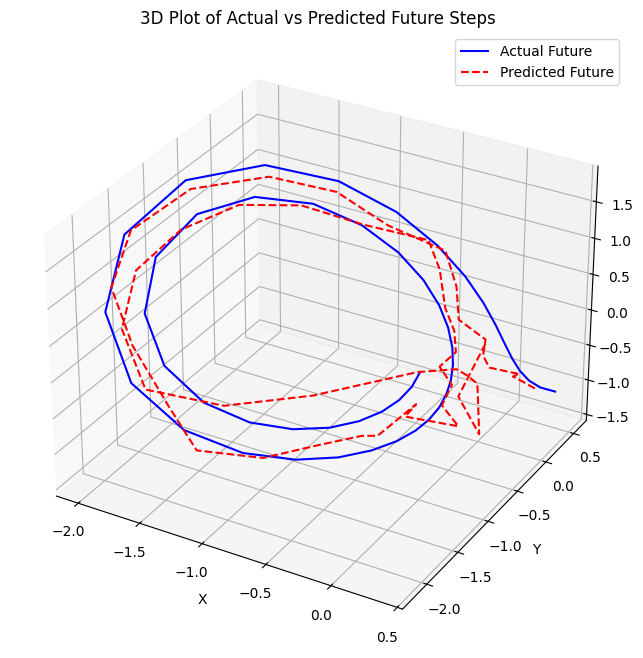

In [ ]:
"""
hier wird rnn mit class torch.nn.RNN implementiert
"""
import os
from pathlib import Path
import torch  
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime


class RNN(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers, num_classes, sequence_length):
        super(RNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.sequence_length = sequence_length
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first= True)
        self.fc1 = nn.Linear(hidden_size, num_classes)
        #self.relu_rnn = nn.ReLU()
        #self.relu1=nn.ReLU()
        #self.fc2 = nn.Linear(int(hidden_size/2), num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        #out = self.relu_rnn(out)
        out = self.fc1(out)
        #out = self.relu1(out)
        #out = self.fc2(out)
        return out
        

        # batch x seq x features
    """
    def forward(self, x, future_steps):
        
        Forward Pass
        x: (batch_size, sequence_length, input_size)
        future_steps: Number of future steps to predict
        out: batch_size, sequence_length, hidden_size
        hidden_state : num_layers, batch_size, hidden_size
        
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        outputs = []
        out, h = self.rnn(x, h0) # pass trough RNN

        out = self.fc(out[:, -1, :]) # initial output from last time step, Extrahiert den Hidden State des letzten Zeitschritts der Sequenz für jeden Batch.
        outputs.append(out)
        
        for _ in range(future_steps - 1): # iterative prediction for future steps
            out, h = self.rnn(out.unsqueeze(1), h)
            out = self.fc(out[:, -1, :])
            
            outputs.append(out)

        return torch.stack(outputs, dim=1) # combine output : (batch_size, future_steps, num_classes)"""
     

    


# Custom Dataset Class
class TimeSeriesDataset(Dataset):
    def __init__(self, data_set, sequence_length):
        """
        Prepares data for sequence-based training with future steps targets
        """
        
        """        # Drop the time column (assume it's not needed for the model)
        data = pd.read_csv(file_path).iloc[1:, 1:].values  # Load X, Y, Z
        
        #convert to Pytorch tensor
        data = torch.tensor(data,dtype=torch.float32)

        #compute mean and standard deviation over features (columns)
        mean = data.mean(dim=0)
        std = data.std(dim=0)

         # Apply normalization
        data = (data - mean) / std"""
        

        """   
        self.sequence_length = sequence_length
        self.future_steps = future_steps
        """
        

        self.X, self.Y = [], []
       

        for i in range(len(data_set) - sequence_length - sequence_length + 1):
            self.X.append(data_set[i:i+sequence_length])
            self.Y.append(data_set[i+sequence_length: i+sequence_length+sequence_length])     

        # Create inputs (X) and targets (Y)
        self.X = torch.stack(self.X)  # All rows except the last
        self.Y = torch.stack(self.Y)   # All rows except the first (shifted)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        # Return a single sample (input, target)
        return self.X[index], self.Y[index]
        
def create_dataloader(file_path, batch_size, sequence_length, shuffle=False):
    """
    Creates a DataLoader from the given file path.
    """
    dataset = TimeSeriesDataset(file_path, sequence_length)

    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, drop_last=True)

def split_and_normalize_dataset(file_path, train_ratio=0.7, val_ratio = 0.15):

    data = pd.read_csv(file_path).iloc[1:, 1:].values
    data = torch.tensor(data, dtype=torch.float32)

    dataset_size = len(data) 
    train_size = int(train_ratio * dataset_size)
    val_size =  int(val_ratio * dataset_size)
    
    train_data = data[:train_size]
    val_data = data[train_size:train_size + val_size]
    test_data = data[train_size+val_size:]

    #compute mean and standard deviation over features (columns)
    train_mean = train_data.mean(dim=0)
    train_std = train_data.std(dim=0)

    # Apply normalization
    normalized_train_data = (train_data - train_mean) / train_std
    normalized_val_data = (val_data - train_mean) / train_std
    normalized_test_data = (test_data - train_mean) / train_std

    return normalized_train_data, normalized_val_data, normalized_test_data

# Train Function
def train(model, data, optimizer, future_steps, loss_fn):

    if torch.cuda.is_available():
        device = "cuda"
    elif  torch.backends.mps.is_available():
        device = "mps"
    else:
        device = "cpu"

    device = torch.device(device)
    model.to(device)
    model.train()

    batch_losses=list()

   
    for X, Y in data:  # X, Y are batches
        
        # Send tensors to the device
        X, Y = X.to(device), Y.to(device)

        # Clear gradients
        optimizer.zero_grad()

        
        prediction = model(X)
      
        loss = loss_fn(prediction, Y)
        # prediction of shape (batch_size, future_steps, output_size=features)
        # Y of shape (batch_size, future_steps, output_size=features)        
        loss.backward()
        optimizer.step()

        batch_losses.append(loss.item())
    
    # Store epoch loss
    train_loss = np.mean(batch_losses) # mean value for all batches in one epoch
    return train_loss


def validation(model, dataloader, future_steps, loss_fn):
    """
    Evaluates the model on the given dataloader and calculates the average loss.
    
    Parameters:
        model: Trained RNN model
        dataloader: DataLoader containing the evaluation dataset
        loss_fn: Loss function (e.g., MSELoss)
        future_steps: Number of future steps to predict
        
    Returns:
        avg_loss: Average loss over the entire dataset
    """
    if torch.cuda.is_available():
        device = "cuda"
    elif  torch.backends.mps.is_available():
        device = "mps"
    else:
        device = "cpu"

    device = torch.device(device)
    model.to(device)
    model.eval()  # Set model to evaluation mode
    
    all_losses = []

    with torch.no_grad():  # Disable gradient computation for evaluation
        for X, Y in dataloader:  # Iterate over batches
            X, Y = X.to(device), Y.to(device)
            
            predictions = model(X)
            loss = loss_fn(predictions, Y)
            all_losses.append(loss.item())

    val_loss = np.mean(all_losses)  # Calculate the average loss
    #print(f"==> Average Loss: {val_loss:.6f}")

    return  val_loss

def test(model, dataloader, future_steps,loss_fn):
    """
    Test the model on the given dataloader and calculates the average loss.
    
    Parameters:
        model: Trained RNN model
        dataloader: DataLoader containing the evaluation dataset
        loss_fn: Loss function (e.g., MSELoss)
        future_steps: Number of future steps to predict
        
    Returns:
        avg_loss: Average loss over the entire dataset
    """
    if torch.cuda.is_available():
        device = "cuda"
    elif  torch.backends.mps.is_available():
        device = "mps"
    else:
        device = "cpu"
    device = torch.device(device)
    model.to(device)
    model.eval()  # Set model to evaluation mode
    
    all_losses = []

    with torch.no_grad():  # Disable gradient computation for evaluation
        for X, Y in dataloader:  # Iterate over batches
            X, Y = X.to(device), Y.to(device)
            
            predictions = model(X)
            loss = loss_fn(predictions, Y)
            all_losses.append(loss.item())

    test_loss = np.mean(all_losses)  # Calculate the average loss
    #print(f"==> Average Loss: {val_loss:.6f}")

    return  test_loss

def plot_predictions(model, data, sequence_length):
    if torch.cuda.is_available():
        device = "cuda"
    elif  torch.backends.mps.is_available():
        device = "mps"
    else:
        device = "cpu"
    device = torch.device(device)
    model.to(device)
    
    model.eval()  # Set model to evaluation mode

    # Select a random starting point for the sequence
    
    start_idx = random.randint(0, len(data) - sequence_length - 1)
    input_sequence = data[start_idx:start_idx + sequence_length].unsqueeze(0).to(device)  # Add batch dimension


    # Get the actual future steps
    actual_future = data[start_idx + sequence_length:start_idx + sequence_length + future_steps].to(device)

    # Predict future steps
    with torch.no_grad():
        predicted_future = model(input_sequence).squeeze(0)  # Remove batch dimension

    
    # Convert tensors to lists for plotting
    actual_future = actual_future.cpu().tolist()
    predicted_future = predicted_future.cpu().tolist()
    
    # Plot the results in 2D
    time_steps = list(range(future_steps))
    plt.figure(figsize=(12, 6))

    # Plot x
    plt.subplot(1, 1, 1)
    plt.plot(time_steps, [x[0] for x in actual_future], label='Actual Future')
    plt.plot(time_steps, [x[0] for x in predicted_future], label='Predicted Future')
    plt.title('X')
    plt.legend()

    # Plot y
    plt.subplot(2, 1, 2)
    plt.plot(time_steps, [x[1] for x in actual_future], label='Actual Future')
    plt.plot(time_steps, [x[1] for x in predicted_future], label='Predicted Future')
    plt.title('Y')
    plt.legend()

    # Plot z
    plt.subplot(3, 1, 3)
    plt.plot(time_steps, [x[2] for x in actual_future], label='Actual Future')
    plt.plot(time_steps, [x[2] for x in predicted_future], label='Predicted Future')
    plt.title('Z')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Plot the results in 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    #ax.plot([x[0] for x in actual_future], [x[1] for x in actual_future], label='Actual Future', color='b')
    #ax.plot([x[0] for x in predicted_future], [x[1] for x in predicted_future], label='Predicted Future', color='r', linestyle='--')
    ax.plot([x[0] for x in actual_future], [x[1] for x in actual_future], [x[2] for x in actual_future], label='Actual Future', color='b')
    ax.plot([x[0] for x in predicted_future], [x[1] for x in predicted_future], [x[2] for x in predicted_future], label='Predicted Future', color='r', linestyle='--')



    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Plot of Actual vs Predicted Future Steps')
    ax.legend()

    plt.show()





class CosineWarmupScheduler(optim.lr_scheduler._LRScheduler):

    def __init__(self, optimizer, warmup, max_iters):
        self.warmup = warmup
        self.max_num_iters = max_iters
        super().__init__(optimizer)

    def get_lr(self):
        lr_factor = self.get_lr_factor(epoch=self.last_epoch)
        return [base_lr * lr_factor for base_lr in self.base_lrs]

    def get_lr_factor(self, epoch):
        lr_factor = 0.5 * (1 + np.cos(np.pi * epoch / self.max_num_iters))
        if epoch <= self.warmup:
            lr_factor *= epoch * 1.0 / self.warmup
        return lr_factor
    

def full_training(sys, dataset_path, sequence_length, future_steps):
    
    batch_size = sys["batch_size"]
    epochs = sys["epochs"]
    hidden_size = sys["hidden_size"]
    input_size = sys["input_size"]
    output_size = sys["output_size"]
    learning_rate = sys["learning_rate"]
    num_layers = sys["num_layers"]
    #patience = system["patience"]
    val_losses=list()
    training_losses = list()
    best_loss = float("inf")
    patience_start = patience
    #split dataset 
    
    training_dataset, test_dataset = split_and_normalize_dataset(dataset_path, 0.7)

    # DataLoader mit Sequenzlänge und Zukunftsschritten
    dataloader_training = create_dataloader(training_dataset, batch_size, sequence_length, future_steps)
    dataloader_evaluate = create_dataloader(test_dataset, batch_size, sequence_length, future_steps)
    # Modell initialisieren
    model = RNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, num_classes=output_size).to(device)
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-2)
    # Initialize the scheduler
    scheduler = CosineWarmupScheduler(optimizer, warmup=20, max_iters=epochs)
    loss_fn = nn.MSELoss()


    start_training_time = datetime.now()

    for epoch in range(epochs):
        
        # Training
        training_loss = train(model, dataloader_training, optimizer, loss_fn, future_steps=future_steps) 
        training_losses.append(training_loss)
        #evaluation   
        val_loss = validation(model, dataloader_evaluate, loss_fn, future_steps=future_steps)   
        val_losses.append(val_loss)

        if (epoch +1) % 10 == 0: 
            print(f"=> Epoch: {epoch + 1}/{epochs}, Training_loss: {training_loss:.6f}, val_loss: {val_loss:.6f}") 

        if val_loss < best_loss:
            best_loss = val_loss    
            patience = patience_start  # Reset patience counter

        else:
            patience -= 1
            if patience == 0:   

                best_training_loss = training_losses[-start_point]
                best_val_loss = val_losses[-start_point]
                training_time = datetime.now() - start_training_time
                return best_training_loss, best_val_loss, training_time
            
    best_training_loss = training_losses[-1]
    best_val_loss = val_losses[-1]
    training_time = datetime.now() - start_training_time
    return  best_training_loss, best_val_loss, training_time

    


if __name__ == "__main__":

    sequence_length = 50  # Eingabelänge (Anzahl Zeitpunkte)
    future_steps = sequence_length     # Anzahl der vorherzusagenden Schritte
    batch_size = 64
    epochs = 200
    hidden_size = 64
    input_size = 3
    output_size = 3
    learning_rate = 0.001
    num_layers = 1

        # Your existing code
    dropout = 0.0
    input_dropout = 0.0

    # Load and preprocess data
    file_path = '/Users/Aleksandar/Documents/Uni/FP/Modeling_Dynamic_Systems/DynSys_and_DataSets/lorenz_system/lorenz_system_data.csv'
    train_data, val_data, test_data = split_and_normalize_dataset(file_path)

    # Create dataloaders
    train_loader = create_dataloader(train_data, batch_size, sequence_length, shuffle=False)
    val_loader = create_dataloader(val_data, batch_size, sequence_length, shuffle=False)
    test_loader = create_dataloader(test_data, batch_size, sequence_length, shuffle=False)

    # Initialize the model
    model = RNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, num_classes=output_size, sequence_length = sequence_length)

    # Initialize the optimizer
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-2)

    # Initialize the scheduler
    scheduler = CosineWarmupScheduler(optimizer, warmup=20, max_iters=epochs)

    # Loss function
    loss_fn = nn.MSELoss()
    patience_start = 30
    if patience_start > epochs:
        patience_start = epochs
    else:
        patience_start = 30
    start_point = patience_start
    training_losses = []
    val_losses = []
    best_loss = float("inf")

    for epoch in range(epochs):
        # Train the model
        train_results = train(model, train_loader, optimizer,future_steps, loss_fn)
        training_losses.append(train_results)

        # Evaluate the model
        val_results = validation(model, val_loader,future_steps, loss_fn)
        val_losses.append(val_results)
        if (epoch + 1) % 10 == 0:
            print(f"Epoch: {epoch + 1} Train Loss: {train_results}, Validation Loss: {val_results}")

        if val_results < best_loss:
            best_loss = val_results
            patience = patience_start  # Reset patience counter
        else:
            patience -= 1
        if patience == 0 :
            best_training_loss = training_losses[-start_point]
            best_val_loss = val_losses[-start_point]
            test_loss = test(model, test_loader,future_steps, loss_fn)
            print("test_loss:", test_loss)
            print(f"Best Train Loss: {best_training_loss}, Best Val Loss: {best_val_loss}")
            break 
        elif epoch == epochs - 1 :
            best_training_loss = training_losses[patience-start_point-1]
            best_val_loss = val_losses[patience-start_point-1]
            test_loss = test(model, test_loader,future_steps, loss_fn)
            print("test_loss:", test_loss)
            print(f"Best Train Loss: {best_training_loss}, Best Val Loss: {best_val_loss}")
            break 


        # Step the scheduler
        scheduler.step()

    plot_predictions(model, test_data, sequence_length)
    


    

Epoch: 10 Train Loss: 0.7093250533582968, Validation Loss: 0.7302887394376423
Epoch: 20 Train Loss: 0.5502282249271323, Validation Loss: 0.5532551085819368
Epoch: 30 Train Loss: 0.3779182477281728, Validation Loss: 0.35095526750968853
Epoch: 40 Train Loss: 0.3075414619587977, Validation Loss: 0.4304102385497611
Epoch: 50 Train Loss: 0.27125959986940434, Validation Loss: 0.25460049396623735
Epoch: 60 Train Loss: 0.22055728549325684, Validation Loss: 0.2514217056334019
Epoch: 70 Train Loss: 0.19644231675619925, Validation Loss: 0.22688161342040353
Epoch: 80 Train Loss: 0.16381733197753034, Validation Loss: 0.1630953837024129
Epoch: 90 Train Loss: 0.1483561570286204, Validation Loss: 0.14019002859359203
Epoch: 100 Train Loss: 0.1439576138597016, Validation Loss: 0.13948010199743768
test_loss: 0.16599518810601338
Best Train Loss: 0.14432593381391207, Best Val Loss: 0.13939986884917901
/var/folders/xf/tfz20cvn1gl4w8nh4z7tshc00000gn/T/ipykernel_9092/1552261364.py:320: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()

  20min mit rnn 2 schichten nach dem rnn

  ---------------------------------

Epoch: 10 Train Loss: 0.7102851613262378, Validation Loss: 0.7111934129310691
Epoch: 20 Train Loss: 0.5266453236204769, Validation Loss: 0.5371745829996856
Epoch: 30 Train Loss: 0.30950005190498237, Validation Loss: 0.3529674164302971
Epoch: 40 Train Loss: 0.25851041440159905, Validation Loss: 0.21913693628233413
Epoch: 50 Train Loss: 0.20693736218531197, Validation Loss: 0.18303660711516503
Epoch: 60 Train Loss: 0.19295817076339633, Validation Loss: 0.20719362730565277
Epoch: 70 Train Loss: 0.17030240404974978, Validation Loss: 0.1736061056346997
Epoch: 80 Train Loss: 0.1356520905304666, Validation Loss: 0.1299015638297019
Epoch: 90 Train Loss: 0.12486677873161954, Validation Loss: 0.12468395259069359
Epoch: 100 Train Loss: 0.12143006025035993, Validation Loss: 0.12409152071113172
test_loss: 0.13529203637786533
Best Train Loss: 0.1232615330931517, Best Val Loss: 0.12399807951372603
/var/folders/xf/tfz20cvn1gl4w8nh4z7tshc00000gn/T/ipykernel_9092/2396289197.py:321: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()

  lstm mit 1 schicht 6 min

  -----------------------------

In [45]:
"""
hier wird rnn mit class torch.nn.RNN implementiert
"""
import os
from pathlib import Path
import torch  
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime


class RNN(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers, num_classes, sequence_length):
        super(RNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.sequence_length = sequence_length
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first= True)
        self.fc = nn.Linear(hidden_size, num_classes)

    
    def forward(self, x, hx=None):
        # x shape: (batch, seq_len, input_size) if batch_first=True
        rnn_out, h_n = self.rnn(x, hx)
        # rnn_out shape: (batch, seq_len, hidden_size) if batch_first=True
        output = self.fc(rnn_out)  # Apply the fully connected layer to each time step
        return output, h_n
        # batch x seq x features
    """
    def forward(self, x, future_steps):
        
        Forward Pass
        x: (batch_size, sequence_length, input_size)
        future_steps: Number of future steps to predict
        out: batch_size, sequence_length, hidden_size
        hidden_state : num_layers, batch_size, hidden_size
        
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        outputs = []
        out, h = self.rnn(x, h0) # pass trough RNN

        out = self.fc(out[:, -1, :]) # initial output from last time step, Extrahiert den Hidden State des letzten Zeitschritts der Sequenz für jeden Batch.
        outputs.append(out)
        
        for _ in range(future_steps - 1): # iterative prediction for future steps
            out, h = self.rnn(out.unsqueeze(1), h)
            out = self.fc(out[:, -1, :])
            
            outputs.append(out)

        return torch.stack(outputs, dim=1) # combine output : (batch_size, future_steps, num_classes)"""
     

    


# Custom Dataset Class
class TimeSeriesDataset(Dataset):
    def __init__(self, data_set, sequence_length):
        """
        Prepares data for sequence-based training with future steps targets
        """
        
        """        # Drop the time column (assume it's not needed for the model)
        data = pd.read_csv(file_path).iloc[1:, 1:].values  # Load X, Y, Z
        
        #convert to Pytorch tensor
        data = torch.tensor(data,dtype=torch.float32)

        #compute mean and standard deviation over features (columns)
        mean = data.mean(dim=0)
        std = data.std(dim=0)

         # Apply normalization
        data = (data - mean) / std"""
        

        """   
        self.sequence_length = sequence_length
        self.future_steps = future_steps
        """
        

        self.X, self.Y = [], []
       

        for i in range(len(data_set) - sequence_length - sequence_length + 1):
            self.X.append(data_set[i:i+sequence_length])
            self.Y.append(data_set[i+sequence_length: i+sequence_length+sequence_length])     

        # Create inputs (X) and targets (Y)
        self.X = torch.stack(self.X)  # All rows except the last
        self.Y = torch.stack(self.Y)   # All rows except the first (shifted)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        # Return a single sample (input, target)
        return self.X[index], self.Y[index]
        
def create_dataloader(file_path, batch_size, sequence_length, shuffle=False):
    """
    Creates a DataLoader from the given file path.
    """
    dataset = TimeSeriesDataset(file_path, sequence_length)

    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, drop_last=True)

def split_and_normalize_dataset(file_path, train_ratio=0.7, val_ratio = 0.15):

    data = pd.read_csv(file_path).iloc[1:, 1:].values
    data = torch.tensor(data, dtype=torch.float32)

    dataset_size = len(data) 
    train_size = int(train_ratio * dataset_size)
    val_size =  int(val_ratio * dataset_size)
    
    train_data = data[:train_size]
    val_data = data[train_size:train_size + val_size]
    test_data = data[train_size+val_size:]

    #compute mean and standard deviation over features (columns)
    train_mean = train_data.mean(dim=0)
    train_std = train_data.std(dim=0)

    # Apply normalization
    normalized_train_data = (train_data - train_mean) / train_std
    normalized_val_data = (val_data - train_mean) / train_std
    normalized_test_data = (test_data - train_mean) / train_std

    return normalized_train_data, normalized_val_data, normalized_test_data

# Train Function
def train(model, data, optimizer, future_steps, loss_fn):

    if torch.cuda.is_available():
        device = "cuda"
    elif  torch.backends.mps.is_available():
        device = "mps"
    else:
        device = "cpu"

    device = torch.device(device)
    model.to(device)
    model.train()

    batch_losses=list()

   
    for X, Y in data:  # X, Y are batches
        
        # Send tensors to the device
        X, Y = X.to(device), Y.to(device)

        # Clear gradients
        optimizer.zero_grad()

        
        prediction = model(X)
        print(prediction.shape, Y.shape)
        loss = loss_fn(prediction, Y)
        # prediction of shape (batch_size, future_steps, output_size=features)
        # Y of shape (batch_size, future_steps, output_size=features)        
        loss.backward()
        optimizer.step()

        batch_losses.append(loss.item())
    
    # Store epoch loss
    train_loss = np.mean(batch_losses) # mean value for all batches in one epoch
    return train_loss


def validation(model, dataloader, future_steps, loss_fn):
    """
    Evaluates the model on the given dataloader and calculates the average loss.
    
    Parameters:
        model: Trained RNN model
        dataloader: DataLoader containing the evaluation dataset
        loss_fn: Loss function (e.g., MSELoss)
        future_steps: Number of future steps to predict
        
    Returns:
        avg_loss: Average loss over the entire dataset
    """
    if torch.cuda.is_available():
        device = "cuda"
    elif  torch.backends.mps.is_available():
        device = "mps"
    else:
        device = "cpu"

    device = torch.device(device)
    model.to(device)
    model.eval()  # Set model to evaluation mode
    
    all_losses = []

    with torch.no_grad():  # Disable gradient computation for evaluation
        for X, Y in dataloader:  # Iterate over batches
            X, Y = X.to(device), Y.to(device)
            
            predictions = model(X)
            loss = loss_fn(predictions, Y)
            all_losses.append(loss.item())

    val_loss = np.mean(all_losses)  # Calculate the average loss
    #print(f"==> Average Loss: {val_loss:.6f}")

    return  val_loss

def test(model, dataloader, future_steps,loss_fn):
    """
    Test the model on the given dataloader and calculates the average loss.
    
    Parameters:
        model: Trained RNN model
        dataloader: DataLoader containing the evaluation dataset
        loss_fn: Loss function (e.g., MSELoss)
        future_steps: Number of future steps to predict
        
    Returns:
        avg_loss: Average loss over the entire dataset
    """
    if torch.cuda.is_available():
        device = "cuda"
    elif  torch.backends.mps.is_available():
        device = "mps"
    else:
        device = "cpu"
    device = torch.device(device)
    model.to(device)
    model.eval()  # Set model to evaluation mode
    
    all_losses = []

    with torch.no_grad():  # Disable gradient computation for evaluation
        for X, Y in dataloader:  # Iterate over batches
            X, Y = X.to(device), Y.to(device)
            
            predictions = model(X)
            loss = loss_fn(predictions, Y)
            all_losses.append(loss.item())

    test_loss = np.mean(all_losses)  # Calculate the average loss
    #print(f"==> Average Loss: {val_loss:.6f}")

    return  test_loss

def plot_predictions(model, data, sequence_length):
    if torch.cuda.is_available():
        device = "cuda"
    elif  torch.backends.mps.is_available():
        device = "mps"
    else:
        device = "cpu"
    device = torch.device(device)
    model.to(device)
    
    model.eval()  # Set model to evaluation mode

    # Select a random starting point for the sequence
    
    start_idx = random.randint(0, len(data) - sequence_length - 1)
    input_sequence = data[start_idx:start_idx + sequence_length].unsqueeze(0).to(device)  # Add batch dimension


    # Get the actual future steps
    actual_future = data[start_idx + sequence_length:start_idx + sequence_length + future_steps].to(device)

    # Predict future steps
    with torch.no_grad():
        predicted_future = model(input_sequence).squeeze(0)  # Remove batch dimension

    
    # Convert tensors to lists for plotting
    actual_future = actual_future.cpu().tolist()
    predicted_future = predicted_future.cpu().tolist()
    
    # Plot the results in 2D
    time_steps = list(range(future_steps))
    plt.figure(figsize=(12, 6))

    # Plot x
    plt.subplot(2, 1, 1)
    plt.plot(time_steps, [x[0] for x in actual_future], label='Actual Future')
    plt.plot(time_steps, [x[0] for x in predicted_future], label='Predicted Future')
    plt.title('X')
    plt.legend()

    # Plot y
    plt.subplot(2, 1, 2)
    plt.plot(time_steps, [x[1] for x in actual_future], label='Actual Future')
    plt.plot(time_steps, [x[1] for x in predicted_future], label='Predicted Future')
    plt.title('Y')
    plt.legend()

    # Plot z
    plt.subplot(3, 1, 3)
    plt.plot(time_steps, [x[2] for x in actual_future], label='Actual Future')
    plt.plot(time_steps, [x[2] for x in predicted_future], label='Predicted Future')
    plt.title('Z')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Plot the results in 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    #ax.plot([x[0] for x in actual_future], [x[1] for x in actual_future], label='Actual Future', color='b')
    #ax.plot([x[0] for x in predicted_future], [x[1] for x in predicted_future], label='Predicted Future', color='r', linestyle='--')
    ax.plot([x[0] for x in actual_future], [x[1] for x in actual_future], [x[2] for x in actual_future], label='Actual Future', color='b')
    ax.plot([x[0] for x in predicted_future], [x[1] for x in predicted_future], [x[2] for x in predicted_future], label='Predicted Future', color='r', linestyle='--')

    ax.set_xlabel('X')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Plot of Actual vs Predicted Future Steps')
    ax.legend()

    plt.show()





class CosineWarmupScheduler(optim.lr_scheduler._LRScheduler):

    def __init__(self, optimizer, warmup, max_iters):
        self.warmup = warmup
        self.max_num_iters = max_iters
        super().__init__(optimizer)

    def get_lr(self):
        lr_factor = self.get_lr_factor(epoch=self.last_epoch)
        return [base_lr * lr_factor for base_lr in self.base_lrs]

    def get_lr_factor(self, epoch):
        lr_factor = 0.5 * (1 + np.cos(np.pi * epoch / self.max_num_iters))
        if epoch <= self.warmup:
            lr_factor *= epoch * 1.0 / self.warmup
        return lr_factor
    

def full_training(sys, dataset_path, sequence_length, future_steps):
    
    batch_size = sys["batch_size"]
    epochs = sys["epochs"]
    hidden_size = sys["hidden_size"]
    input_size = sys["input_size"]
    output_size = sys["output_size"]
    learning_rate = sys["learning_rate"]
    num_layers = sys["num_layers"]
    #patience = system["patience"]
    val_losses=list()
    training_losses = list()
    best_loss = float("inf")
    patience_start = patience
    #split dataset 
    
    training_dataset, test_dataset = split_and_normalize_dataset(dataset_path, 0.7)

    # DataLoader mit Sequenzlänge und Zukunftsschritten
    dataloader_training = create_dataloader(training_dataset, batch_size, sequence_length, future_steps)
    dataloader_evaluate = create_dataloader(test_dataset, batch_size, sequence_length, future_steps)
    # Modell initialisieren
    model = RNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, num_classes=output_size).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    loss_fn = nn.MSELoss()


    start_training_time = datetime.now()

    for epoch in range(epochs):
        
        # Training
        training_loss = train(model, dataloader_training, optimizer, loss_fn, future_steps=future_steps) 
        training_losses.append(training_loss)
        #evaluation   
        val_loss = validation(model, dataloader_evaluate, loss_fn, future_steps=future_steps)   
        val_losses.append(val_loss)

        if (epoch +1) % 10 == 0: 
            print(f"=> Epoch: {epoch + 1}/{epochs}, Training_loss: {training_loss:.6f}, val_loss: {val_loss:.6f}") 

        if val_loss < best_loss:
            best_loss = val_loss    
            patience = patience_start  # Reset patience counter

        else:
            patience -= 1
            if patience == 0:   

                best_training_loss = training_losses[-start_point]
                best_val_loss = val_losses[-start_point]
                training_time = datetime.now() - start_training_time
                return best_training_loss, best_val_loss, training_time
            
    best_training_loss = training_losses[-1]
    best_val_loss = val_losses[-1]
    training_time = datetime.now() - start_training_time
    return  best_training_loss, best_val_loss, training_time

    


if __name__ == "__main__":

    sequence_length = 50  # Eingabelänge (Anzahl Zeitpunkte)
    future_steps = sequence_length     # Anzahl der vorherzusagenden Schritte
    batch_size = 64
    epochs = 100
    hidden_size = 80
    input_size = 3
    output_size = 3
    learning_rate = 0.001
    num_layers = 1

        # Your existing code
    dropout = 0.0
    input_dropout = 0.0
    learning_rate = 0.001

    # Load and preprocess data
    file_path = '/Users/Aleksandar/Documents/Uni/FP/Modeling_Dynamic_Systems/DynSys_and_DataSets/lorenz_system/lorenz_system_data.csv'
    train_data, val_data, test_data = split_and_normalize_dataset(file_path)

    # Create dataloaders
    train_loader = create_dataloader(train_data, batch_size, sequence_length, shuffle=False)
    val_loader = create_dataloader(val_data, batch_size, sequence_length, shuffle=False)
    test_loader = create_dataloader(test_data, batch_size, sequence_length, shuffle=False)

    # Initialize the model
    model = RNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, num_classes=output_size, sequence_length = sequence_length)

    # Initialize the optimizer
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Initialize the scheduler
    scheduler = CosineWarmupScheduler(optimizer, warmup=20, max_iters=epochs)

    # Loss function
    loss_fn = nn.MSELoss()
    patience_start = 30
    if patience_start > epochs:
        patience_start = epochs
    else:
        patience_start = 30
    start_point = patience_start
    training_losses = []
    val_losses = []
    best_loss = float("inf")

    for epoch in range(epochs):
        # Train the model
        train_results = train(model, train_loader, optimizer,future_steps, loss_fn)
        training_losses.append(train_results)

        # Evaluate the model
        val_results = validation(model, val_loader,future_steps, loss_fn)
        val_losses.append(val_results)
        if (epoch + 1) % 10 == 0:
            print(f"Epoch: {epoch + 1} Train Loss: {train_results}, Validation Loss: {val_results}")

        if val_results < best_loss:
            best_loss = val_results
            patience = patience_start  # Reset patience counter
        else:
            patience -= 1
        if patience == 0 :
            best_training_loss = training_losses[-start_point]
            best_val_loss = val_losses[-start_point]
            test_loss = test(model, test_loader,future_steps, loss_fn)
            print("test_loss:", test_loss)
            print(f"Best Train Loss: {best_training_loss}, Best Val Loss: {best_val_loss}")
            break 
        elif epoch == epochs - 1 :
            best_training_loss = training_losses[patience-start_point-1]
            best_val_loss = val_losses[patience-start_point-1]
            test_loss = test(model, test_loader,future_steps, loss_fn)
            print("test_loss:", test_loss)
            print(f"Best Train Loss: {best_training_loss}, Best Val Loss: {best_val_loss}")
            break 


        # Step the scheduler
        scheduler.step()

    plot_predictions(model, test_data, sequence_length)
    

    



    

AttributeError: 'tuple' object has no attribute 'shape'